In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns;
from sklearn import tree
import graphviz
import scipy

In [2]:
df = pd.read_csv('seeds_dataset.txt', sep="\t", error_bad_lines=False, warn_bad_lines=True)

# To construct the data, seven geometric parameters of wheat kernels were measured:
# 1. area A,
# 2. perimeter P,
# 3. compactness C = 4*pi*A/P^2,
# 4. length of kernel,
# 5. width of kernel,
# 6. asymmetry coefficient
# 7. length of kernel groove.

# target (three different varieties of wheat): Kama (1), Rosa (2) and Canadian (3)

df.columns=['area','perimeter','compactness','length_kernel','width_kernel','asymmetry_coeff','length_of_kernel_groove','target']
feature_nms = ['area','perimeter','compactness','length_kernel','width_kernel','asymmetry_coeff','length_of_kernel_groove']
class_nms = ['Kama','Rosa','Canadian']


b'Skipping line 8: expected 8 fields, saw 10\nSkipping line 36: expected 8 fields, saw 10\nSkipping line 61: expected 8 fields, saw 9\nSkipping line 69: expected 8 fields, saw 9\nSkipping line 107: expected 8 fields, saw 9\nSkipping line 136: expected 8 fields, saw 9\nSkipping line 170: expected 8 fields, saw 9\nSkipping line 171: expected 8 fields, saw 9\nSkipping line 173: expected 8 fields, saw 9\nSkipping line 202: expected 8 fields, saw 9\nSkipping line 204: expected 8 fields, saw 9\n'


In [3]:
df.head()

,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coeff,length_of_kernel_groove,target
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1


In [4]:
df.describe()

,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coeff,length_of_kernel_groove,target
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,14.917020,14.594596,0.870810,5.642545,3.265298,3.706683,5.421667,2.000000
std,2.927276,1.313651,0.023379,0.444635,0.379266,1.471047,0.493759,0.812341
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.315000,13.470000,0.856900,5.267000,2.953750,2.600250,5.046000,1.000000
50%,14.405000,14.360000,0.873450,5.541000,3.243500,3.634500,5.229500,2.000000
75%,17.502500,15.827500,0.886900,6.004000,3.565250,4.812000,5.879000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.315000,6.550000,3.000000


# Feature Analysis

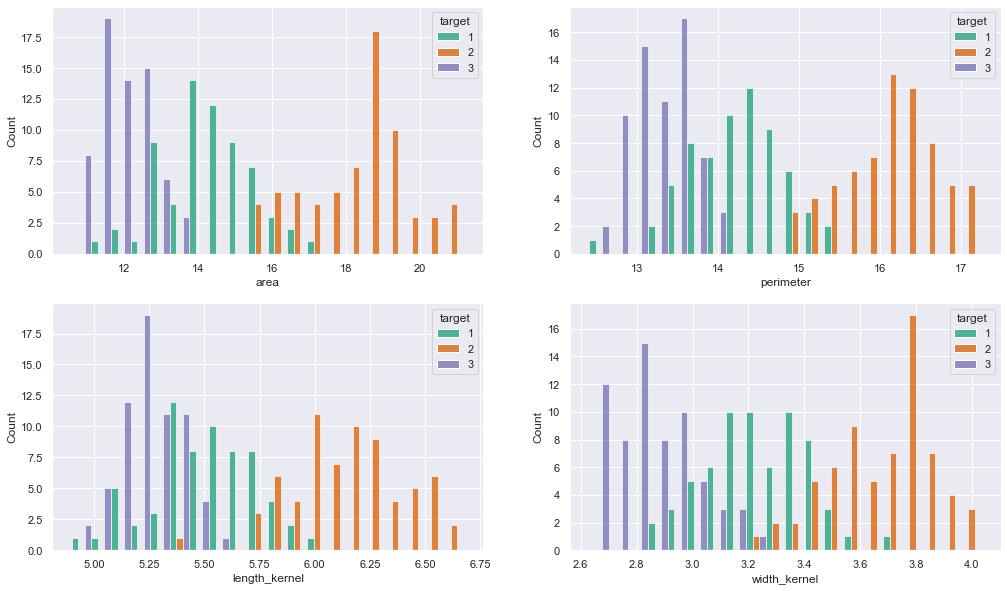

In [33]:
fig = plt.figure(figsize=(17,10))
plt.subplot(2,2,1)
sns.histplot(data=df,x="area",hue="target",multiple="dodge", bins=20, palette='Dark2')
plt.subplot(2,2,2)
sns.histplot(data=df,x="perimeter",hue="target",multiple="dodge", bins=20, palette='Dark2')
plt.subplot(2,2,3)
sns.histplot(data=df,x="length_kernel",hue="target",multiple="dodge", bins=20, palette='Dark2')
plt.subplot(2,2,4)
sns.histplot(data=df,x="width_kernel",hue="target",multiple="dodge", bins=20, palette='Dark2')

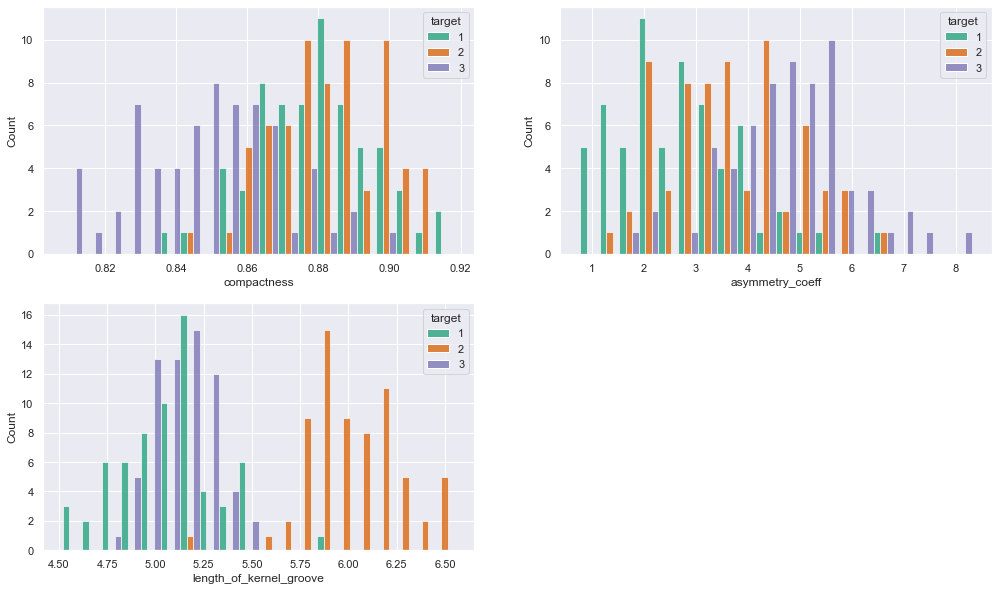

In [35]:
fig = plt.figure(figsize=(17,10))
plt.subplot(2,2,1)
sns.histplot(data=df,x="compactness",hue="target",multiple="dodge", bins=20, palette='Dark2')
plt.subplot(2,2,2)
sns.histplot(data=df,x="asymmetry_coeff",hue="target",multiple="dodge", bins=20, palette='Dark2')
plt.subplot(2,2,3)
sns.histplot(data=df,x="length_of_kernel_groove",hue="target",multiple="dodge", bins=20, palette='Dark2')

### From the distribution of the histogram plots above, we can see that the class separation with respect to compactness and asymmetry_coeff is not vert promising by its own. length_of_kernel_groove shows good class separation between class 2 and the rest of the class.

### From the above hist plot with perimeter, we can seem to find a couple of outliers that belong to class 1 or "kama". We will further investigate

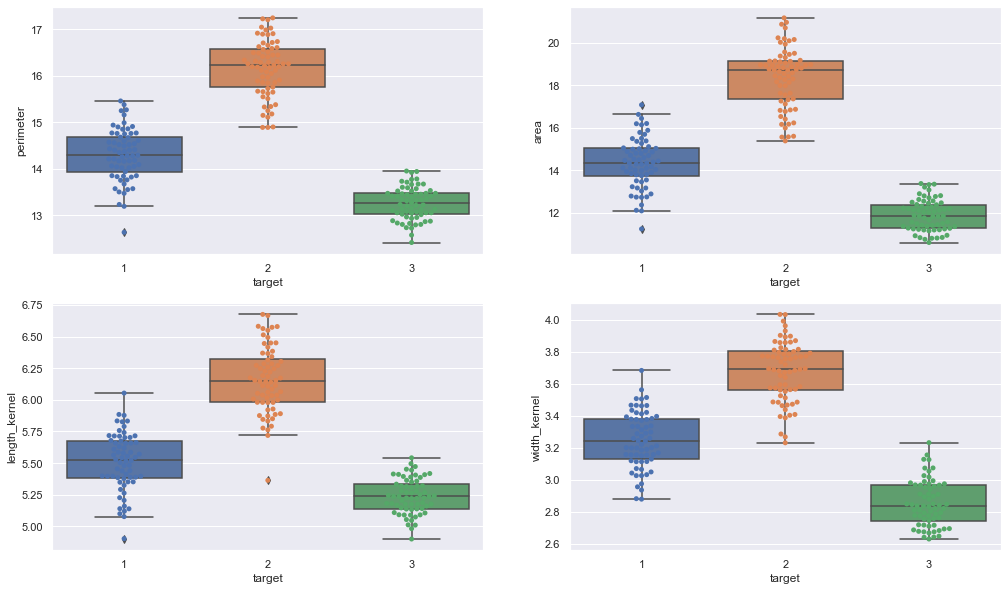

In [34]:
fig = plt.figure(figsize=(17,10))
plt.subplot(2,2,1)
ax = sns.boxplot(data=df, x="target",y="perimeter")
ax = sns.swarmplot(data=df,x="target",y="perimeter")
plt.subplot(2,2,2)
ax = sns.boxplot(data=df, x="target",y="area")
ax = sns.swarmplot(data=df,x="target",y="area")
plt.subplot(2,2,3)
ax = sns.boxplot(data=df, x="target",y="length_kernel")
ax = sns.swarmplot(data=df,x="target",y="length_kernel")
plt.subplot(2,2,4)
ax = sns.boxplot(data=df, x="target",y="width_kernel")
ax = sns.swarmplot(data=df,x="target",y="width_kernel")

### The points for perimeters below 13 can indeed be considered as outliers for class 1 ("kama") which is evident from the above plot. Similarly, length_kernel also has some outliers which is evident from the above plot.

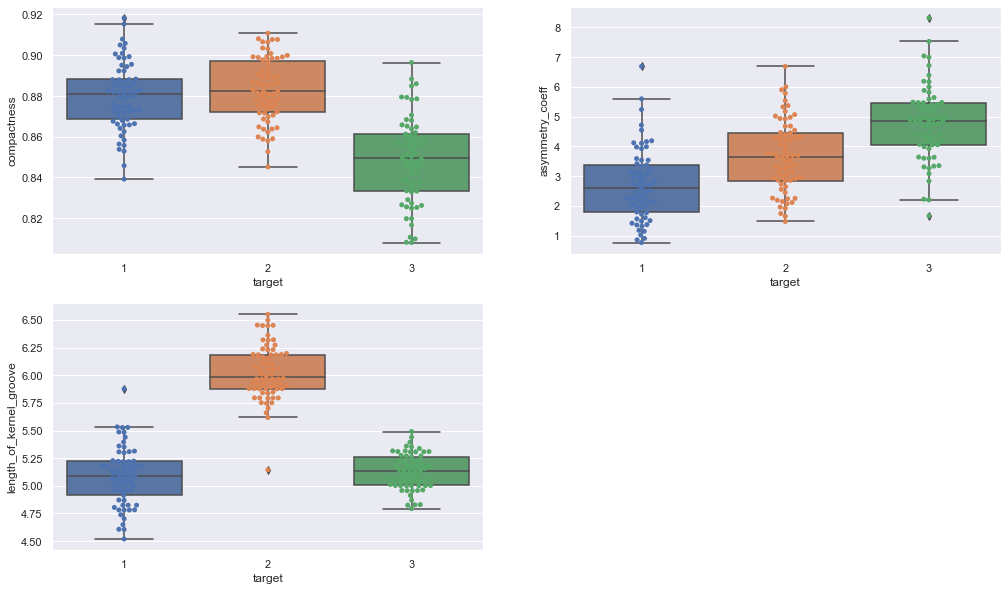

In [36]:
fig = plt.figure(figsize=(17,10))
plt.subplot(2,2,1)
ax = sns.boxplot(data=df, x="target",y="compactness")
ax = sns.swarmplot(data=df,x="target",y="compactness")
plt.subplot(2,2,2)
ax = sns.boxplot(data=df, x="target",y="asymmetry_coeff")
ax = sns.swarmplot(data=df,x="target",y="asymmetry_coeff")
plt.subplot(2,2,3)
ax = sns.boxplot(data=df, x="target",y="length_of_kernel_groove")
ax = sns.swarmplot(data=df,x="target",y="length_of_kernel_groove")

### From the above plot we have identified several other outliers from other features as well. We'll handle all these identified outliers.

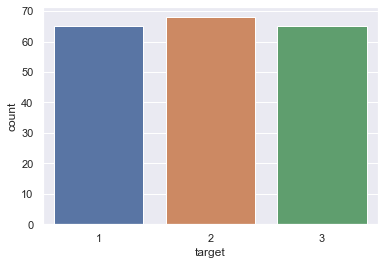

In [40]:
sns.countplot(data = df, x="target")

### There isn't any significant class imbalance in the data

# Outlier processing

In [5]:
df_1 = df[df["target"]==1]
df_2 = df[df["target"]==2]
df_3 = df[df["target"]==3]
thres_dict_1 = {"perimeter":[16,13],"area":[16.8,12],"length_kernel":[6,5],"length_of_kernel_groove":[5.75,4],"asymmetry_coeff":[6,0]}
thres_dict_2 = {"length_kernel":[6.75,5.50],"length_of_kernel_groove":[7,5.5]}
thres_dict_3 = {"asymmetry_coeff":[8,2]}

In [6]:
for k in list(thres_dict_1.keys()):
    for i in list(df_1.index):
        if df_1.loc[i,k] > thres_dict_1[k][0] or df_1.loc[i,k] < thres_dict_1[k][1]:
            df_1.loc[i,k] = np.nan

for k in list(thres_dict_2.keys()):
    for i in list(df_2.index):
        if df_2.loc[i,k] > thres_dict_2[k][0] or df_2.loc[i,k] < thres_dict_2[k][1]:
            df_2.loc[i,k] = np.nan

for k in list(thres_dict_3.keys()):
    for i in list(df_3.index):
        if df_3.loc[i,k] > thres_dict_3[k][0] or df_3.loc[i,k] < thres_dict_3[k][1]:
            df_3.loc[i,k] = np.nan

In [7]:
df = pd.concat([df_1,df_2,df_3])

In [8]:
df = df.dropna()
df.describe(include='all')

,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coeff,length_of_kernel_groove,target
count,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000
mean,14.936911,14.607696,0.870258,5.649654,3.264382,3.699797,5.429565,2.010471
std,2.951330,1.322467,0.023314,0.446031,0.382046,1.426179,0.496522,0.807788
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.330000,13.465000,0.856550,5.267000,2.954500,2.664000,5.046000,1.000000
50%,14.430000,14.370000,0.872600,5.545000,3.242000,3.639000,5.263000,2.000000
75%,17.630000,15.860000,0.886300,6.011500,3.564500,4.799000,5.879500,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,7.524000,6.550000,3.000000


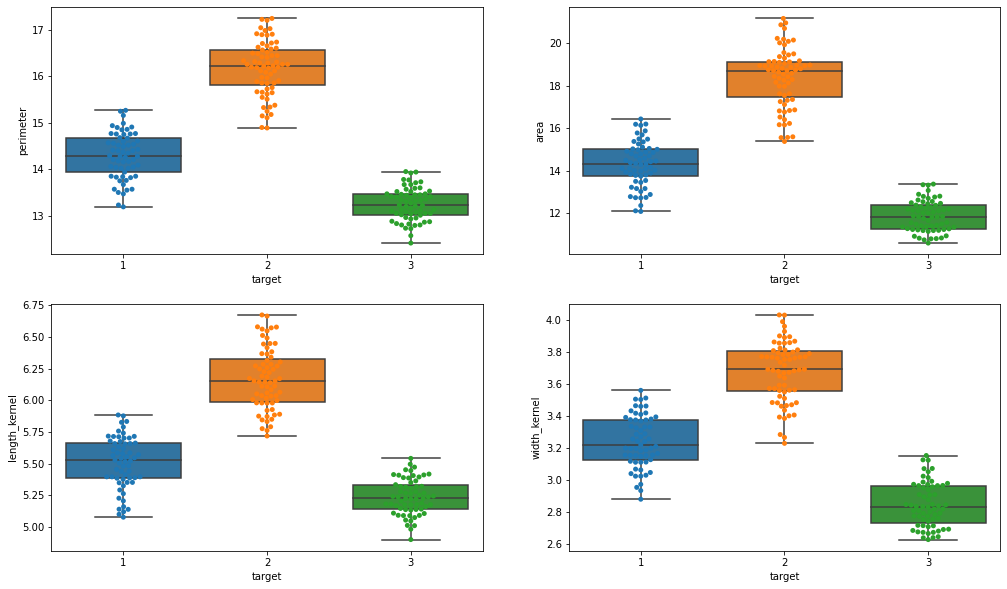

In [9]:
fig = plt.figure(figsize=(17,10))
plt.subplot(2,2,1)
ax = sns.boxplot(data=df, x="target",y="perimeter")
ax = sns.swarmplot(data=df,x="target",y="perimeter")
plt.subplot(2,2,2)
ax = sns.boxplot(data=df, x="target",y="area")
ax = sns.swarmplot(data=df,x="target",y="area")
plt.subplot(2,2,3)
ax = sns.boxplot(data=df, x="target",y="length_kernel")
ax = sns.swarmplot(data=df,x="target",y="length_kernel")
plt.subplot(2,2,4)
ax = sns.boxplot(data=df, x="target",y="width_kernel")
ax = sns.swarmplot(data=df,x="target",y="width_kernel")

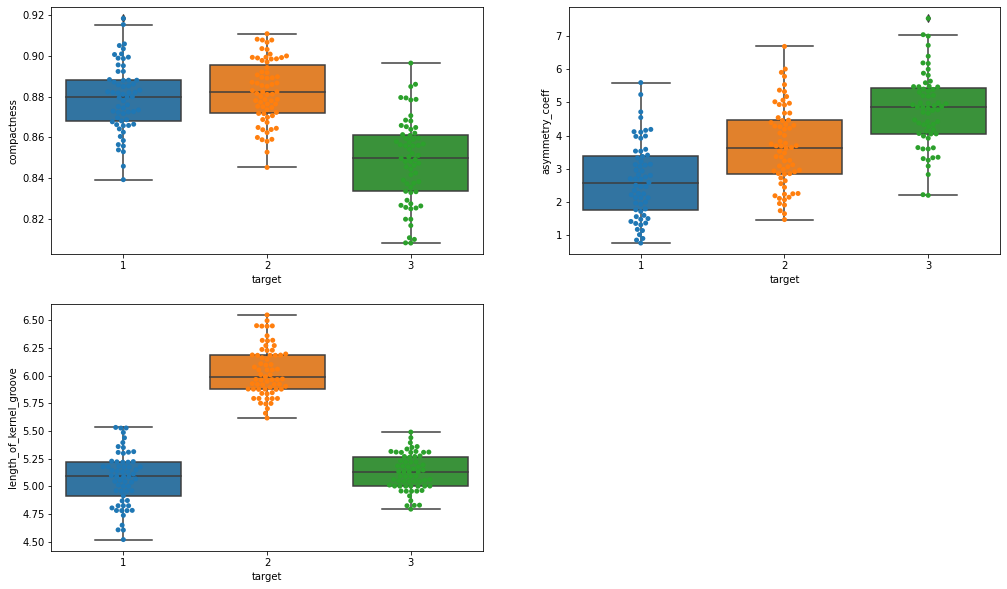

In [10]:
fig = plt.figure(figsize=(17,10))
plt.subplot(2,2,1)
ax = sns.boxplot(data=df, x="target",y="compactness")
ax = sns.swarmplot(data=df,x="target",y="compactness")
plt.subplot(2,2,2)
ax = sns.boxplot(data=df, x="target",y="asymmetry_coeff")
ax = sns.swarmplot(data=df,x="target",y="asymmetry_coeff")
plt.subplot(2,2,3)
ax = sns.boxplot(data=df, x="target",y="length_of_kernel_groove")
ax = sns.swarmplot(data=df,x="target",y="length_of_kernel_groove")

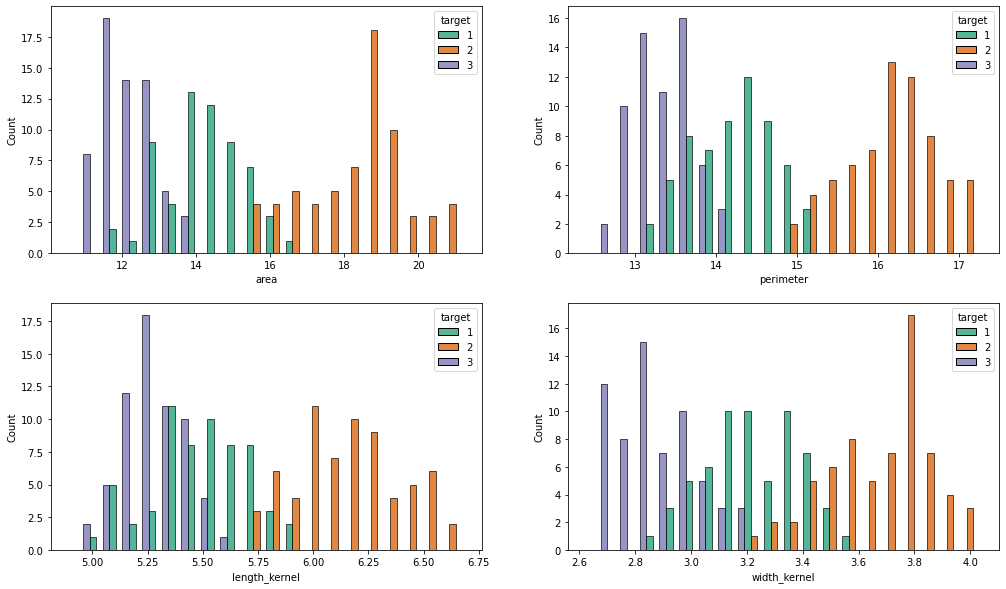

In [27]:
fig = plt.figure(figsize=(17,10))
plt.subplot(2,2,1)
sns.histplot(data=df,x="area",hue="target",multiple="dodge", bins=20, palette='Dark2')
plt.subplot(2,2,2)
sns.histplot(data=df,x="perimeter",hue="target",multiple="dodge", bins=20, palette='Dark2')
plt.subplot(2,2,3)
sns.histplot(data=df,x="length_kernel",hue="target",multiple="dodge", bins=20, palette='Dark2')
plt.subplot(2,2,4)
sns.histplot(data=df,x="width_kernel",hue="target",multiple="dodge", bins=20, palette='Dark2')

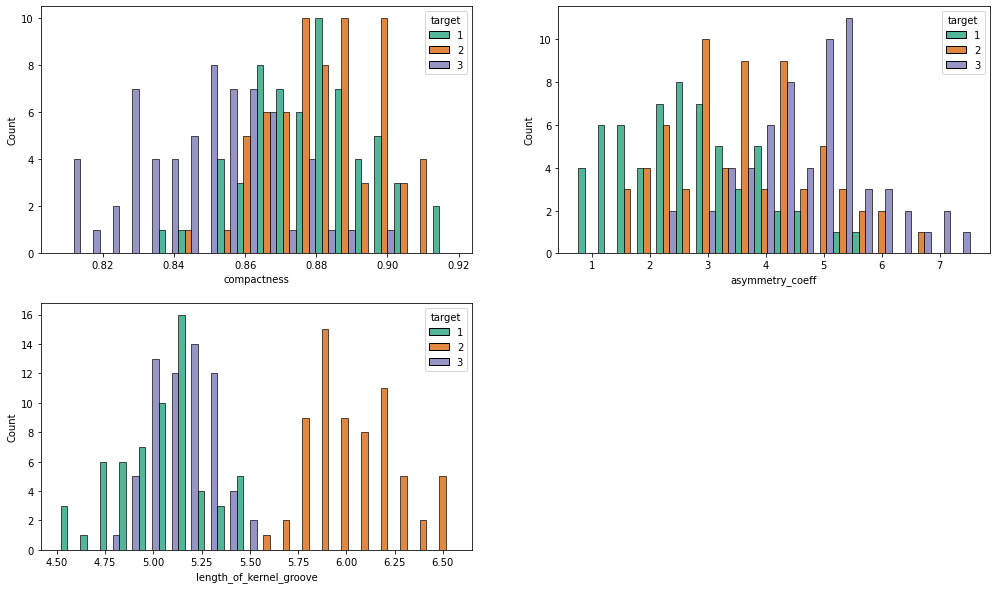

In [28]:
fig = plt.figure(figsize=(17,10))
plt.subplot(2,2,1)
sns.histplot(data=df,x="compactness",hue="target",multiple="dodge", bins=20, palette='Dark2')
plt.subplot(2,2,2)
sns.histplot(data=df,x="asymmetry_coeff",hue="target",multiple="dodge", bins=20, palette='Dark2')
plt.subplot(2,2,3)
sns.histplot(data=df,x="length_of_kernel_groove",hue="target",multiple="dodge", bins=20, palette='Dark2')

### Outliers have been removed.

# Normalization

In [21]:
feature_cols = list(df.columns)
target_col = feature_cols.pop()
df_feat = df[feature_cols]
df_target = df.drop(columns = feature_cols)

In [14]:
#df_feat = df_feat.drop(columns = ["asymmetry_coeff"])

In [15]:
#Code for z-score normalization. 
for i in list(df_feat.columns):
    df_feat[i] = scipy.stats.zscore(df_feat.loc[:,i].values)
df_norm = pd.concat([df_feat,df_target],axis=1)

In [22]:
df_feat

,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coeff,length_of_kernel_groove
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956
...,...,...,...,...,...,...,...
192,12.37,13.47,0.8567,5.204,2.960,3.919,5.001
193,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
194,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
196,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


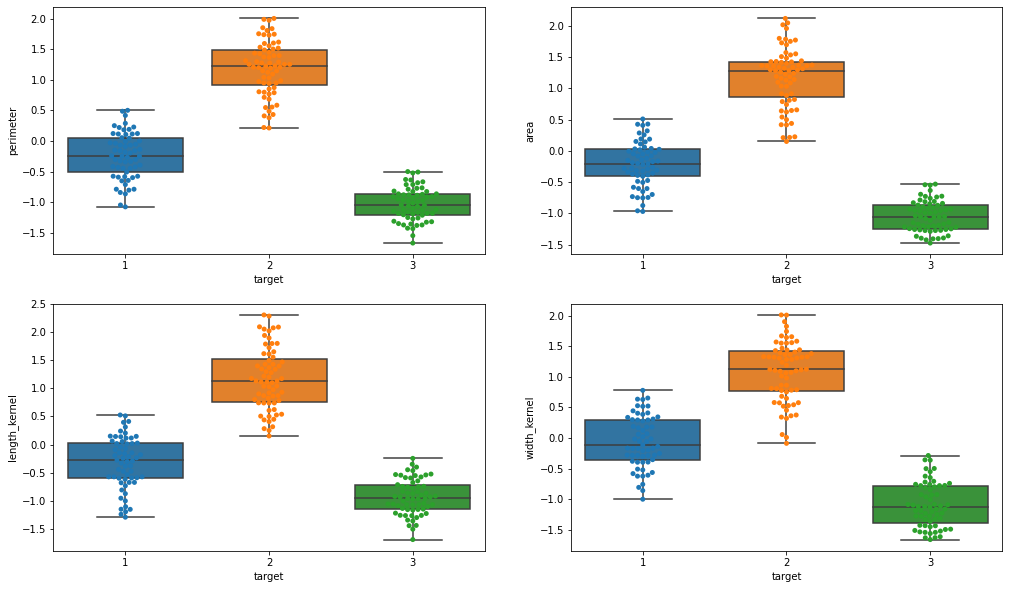

In [23]:
fig = plt.figure(figsize=(17,10))
plt.subplot(2,2,1)
ax = sns.boxplot(data=df_norm, x="target",y="perimeter")
ax = sns.swarmplot(data=df_norm,x="target",y="perimeter")
plt.subplot(2,2,2)
ax = sns.boxplot(data=df_norm, x="target",y="area")
ax = sns.swarmplot(data=df_norm,x="target",y="area")
plt.subplot(2,2,3)
ax = sns.boxplot(data=df_norm, x="target",y="length_kernel")
ax = sns.swarmplot(data=df_norm,x="target",y="length_kernel")
plt.subplot(2,2,4)
ax = sns.boxplot(data=df_norm, x="target",y="width_kernel")
ax = sns.swarmplot(data=df_norm,x="target",y="width_kernel")

In [24]:
X_train,X_test,Y_train,Y_test = train_test_split(df_feat,df_target, test_size = 0.2, random_state= 225)

## Decision Tree

Text(0, 0.5, 'Accuracy')

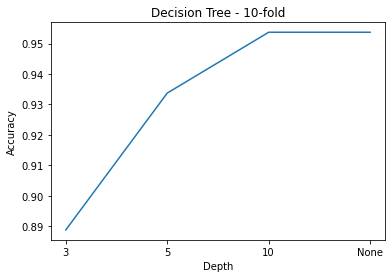

In [25]:
#Decision tree
kf = KFold(n_splits=10)
max_depth = [3,5,10,None]
performance_dict = {}
for max_d in max_depth:
    acc = []
    for train_index,val_index in kf.split(X_train):
        clf = DecisionTreeClassifier(max_depth = max_d, random_state=0, criterion='gini')
        X_Tr = X_train.iloc[train_index,:]
        Y_Tr = Y_train.iloc[train_index,:]
        X_V = X_train.iloc[val_index,:]
        Y_V = Y_train.iloc[val_index,:]
        clf = clf.fit(X_Tr, Y_Tr)
        Y_P = clf.predict(X_V)
        acc.append(metrics.accuracy_score(Y_V, Y_P))
    performance_dict[max_d] = np.mean(acc)
accuracies = list(performance_dict.values())
plt.title("Decision Tree - 10-fold")
plt.plot([1,2,3,4], accuracies)
plt.xticks([1,2,3,4],['3','5','10','None'])
plt.xlabel('Depth')
plt.ylabel('Accuracy')
#tree.plot_tree(clf)

## Examining the Depth values for Decision Tree
### We get a increasing trend in accuracy for every consecutive depth value until a depth level of 10 where the accuracy reaches a value of well above 0.95. Post that, for successive give depth value(s) the accuracy remains the same. As the deeper we go, the more computation we end up doing, we'll choose to go with depth of 10 over 'None'. This will ensure goodness in terms of model performance and computation requirements. 

## Z-Score Normalized vs Un-Normalized 
### Decision trees were tried with both z-score normalized and un-normalized data and they both yielded similar performance. This could be because z-normalization accomplishes centering data about the mean. It causes moving and squishing of datapoints together in the spatial domain. In decision tree technique, intuitively speaking, we are just asking a series of 'yes' or 'no' questions until we arrive at an outcome. Manipulation in scale and spatial orientation of datapoints does not help decision trees process the data any differently. Hence, normalization does not have any impact on decision tree method.

## Examing the decision tree for depth = 10
### The tree diagram inline with code is not very much visible and hence the tree diagram is attached separately. Any explanation written here is with reference to that. I request the TA to refer to the attached diagram as well.

Decision Tree Test Accuracy at depth of 10 is... 0.9743589743589743


[Text(181.35000000000002, 195.696, 'length_of_kernel_groove <= 5.576\ngini = 0.663\nsamples = 152\nvalue = [46, 58, 48]\nclass = Rosa'),
 Text(153.45000000000002, 152.208, 'area <= 12.71\ngini = 0.5\nsamples = 94\nvalue = [46, 0, 48]\nclass = Canadian'),
 Text(83.7, 108.72, 'width_kernel <= 3.016\ngini = 0.087\nsamples = 44\nvalue = [2, 0, 42]\nclass = Canadian'),
 Text(55.800000000000004, 65.232, 'asymmetry_coeff <= 1.808\ngini = 0.045\nsamples = 43\nvalue = [1, 0, 42]\nclass = Canadian'),
 Text(27.900000000000002, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = Kama'),
 Text(83.7, 21.744, 'gini = 0.0\nsamples = 42\nvalue = [0, 0, 42]\nclass = Canadian'),
 Text(111.60000000000001, 65.232, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = Kama'),
 Text(223.20000000000002, 108.72, 'asymmetry_coeff <= 4.607\ngini = 0.211\nsamples = 50\nvalue = [44, 0, 6]\nclass = Kama'),
 Text(167.4, 65.232, 'length_kernel <= 5.106\ngini = 0.046\nsamples = 42\nvalue = [41, 0, 1]\nclass = 

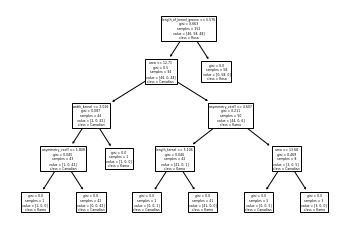

In [29]:
clf = DecisionTreeClassifier(max_depth = 5, random_state=0, criterion='gini')
clf = clf.fit(X_train,Y_train)
Y_P = clf.predict(X_test)
DT_Test_Acc = metrics.accuracy_score(Y_test, Y_P)
print("Decision Tree Test Accuracy at depth of 10 is...", DT_Test_Acc)
tree.plot_tree(clf, feature_names=feature_nms, class_names=class_nms)

### 1) Referring to the diagram, we can see that the first split is with respect to 'length_of_kernel_groove' feature. This is inline with our observation in the feature selection process where by looking at the histogram, we said that length_of_kernel_groove gives good class separation of 'Rosa' from the other two seeds. We can also see that a split at 'length_of_kernel_groove' at the right threshold essentially separates out class 'Rosa' from the rest of the two. This is evident from the fact that the right leaf of this node needed no further splits to arrive at an inference. Intuitively as well, if we had to pick a feature for class separation by visual examination of histograms, we would pick this feature first as well since it offers good class separation. It is interesting to know that the algorithm  with its feature and split separation metrics is able to do that too. This also shows how relatable and interpretable decision tree method is. Looking at the threshold value selected (5.57), we can see how the algorithm chose the perfect value to ensure full class separation of 'Rosa' from the rest.

### 2)Referring to the tree diagram, with 'Rosa' now separated out, we can see that the next feature that was selected for split is 'area'. Again referring to the histogram plots, we can see that there is overlap between the distribution of 'Kama' and 'Canadian' in all the features. But the degree of overlap is relatively lesser in 'area' as compared to other features. The 'gini' measure that we are employing for feature and split selection has also seem to have captured the same.

### 3)The same pattern is repeated deeper down the tree. The feature that shows maximum separation is chosen for split at the precise value to ensure maximum information gain or reduction in entropy or randomness of the data. This is intuitively how human beings approach this problem as well. Hence the method is highly relatable and interpretable.



## Random Forest

Text(30.5, 0.5, 'Depth')

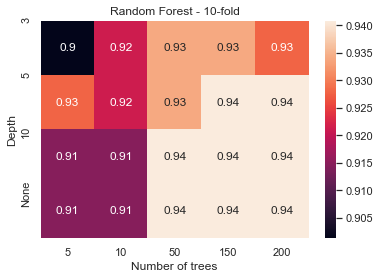

In [212]:
#Random Forest
kf = KFold(n_splits=10)
n_trees = [5,10,50,150,200]
max_depth = [3,5,10,None]
perf_n_tree = pd.DataFrame()
perf_depth = []
for n_tree in n_trees:
    perf_depth=[]
    for max_d in max_depth:
        acc = []
        for train_index,val_index in kf.split(X_train):
            clf = RandomForestClassifier(max_depth = max_d,n_estimators = n_tree, random_state=0)
            X_Tr = X_train.iloc[train_index,:]
            Y_Tr = Y_train.iloc[train_index,:]
            X_V = X_train.iloc[val_index,:]
            Y_V = Y_train.iloc[val_index,:]
            clf = clf.fit(X_Tr, Y_Tr)
            Y_P = clf.predict(X_V)
            acc.append(metrics.accuracy_score(Y_V, Y_P))
        perf_depth.append(np.mean(acc))
    #perf_n_tree[n_tree]=copy.deepcopy(perf_depth)
    perf_n_tree[str(n_tree)]=perf_depth
accuracies = list(performance_dict.values())
plt.title("Random Forest - 10-fold")
hm = sns.heatmap(perf_n_tree, annot=True)
plt.yticks([0,1,2,3],['3','5','10','None'])
plt.xlabel('Number of trees')
plt.ylabel('Depth')

## Evaluating hyperparameters for Random Forest
### From the heatmap plot above, we can see that we attain best performance at a range of values the hyperparameters of Depth and Number of Trees. Among this, the best value to pick would be Depth = 5 & Number of Trees = 150 considering the positive impact it would have on computation performance and inference speed. Higher these two parameters are, more is the performance overhead interms of storage and computation. This is because, deeper the tree is, the node increases in power of 2.

In [30]:
clf = RandomForestClassifier(max_depth = 5, random_state=0, n_estimators=150)
clf = clf.fit(X_train,Y_train)
Y_P = clf.predict(X_test)
RF_Test_Acc = metrics.accuracy_score(Y_test, Y_P)
print("Random Forest Test Accuracy at depth of 5 and Max 150 no of trees is...", RF_Test_Acc)

Random Forest Test Accuracy at depth of 5 and Max 150 no of trees is... 0.9487179487179487


## Gradient Boosting Classifier

Text(0, 0.5, 'Accuracy')

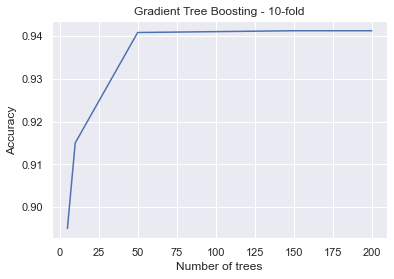

In [216]:
#Gradient Boosting Classifier
kf = KFold(n_splits=10)
n_trees = [5,10,50,150,200]
perf_n_tree = []
for n_tree in n_trees:
    acc = []
    for train_index,val_index in kf.split(X_train):
        clf = GradientBoostingClassifier(n_estimators = n_tree)
        X_Tr = X_train.iloc[train_index,:]
        Y_Tr = Y_train.iloc[train_index,:]
        X_V = X_train.iloc[val_index,:]
        Y_V = Y_train.iloc[val_index,:]
        clf = clf.fit(X_Tr, Y_Tr)
        Y_P = clf.predict(X_V)
        acc.append(metrics.accuracy_score(Y_V, Y_P))
    perf_n_tree.append(np.mean(acc))
    #perf_n_tree[n_tree]=copy.deepcopy(perf_depth)
plt.title("Gradient Tree Boosting - 10-fold")
plt.plot(n_trees, perf_n_tree)
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')

## Performance and hyperparameter evaluation
### Performance peaks at 50 number of trees and it remains the same for greater number of trees. Considering the computation savings we get from going with lesser number of trees we will choose 50 for the number of trees hyperparameter value.

In [31]:
clf = GradientBoostingClassifier(n_estimators=50)
clf = clf.fit(X_train,Y_train)
Y_P = clf.predict(X_test)
GB_Test_Acc = metrics.accuracy_score(Y_test, Y_P)
print("Gradient Boosting Test Accuracy at  Max 50 no of trees is...", GB_Test_Acc)

Gradient Boosting Test Accuracy at  Max 50 no of trees is... 0.9743589743589743


# Without any preprocessing

In [33]:
df = pd.read_csv('seeds_dataset.txt', sep="\t", error_bad_lines=False, warn_bad_lines=True)

# To construct the data, seven geometric parameters of wheat kernels were measured:
# 1. area A,
# 2. perimeter P,
# 3. compactness C = 4*pi*A/P^2,
# 4. length of kernel,
# 5. width of kernel,
# 6. asymmetry coefficient
# 7. length of kernel groove.

# target (three different varieties of wheat): Kama (1), Rosa (2) and Canadian (3)

df.columns=['area','perimeter','compactness','length_kernel','width_kernel','asymmetry_coeff','length_of_kernel_groove','target']
feature_nms = ['area','perimeter','compactness','length_kernel','width_kernel','asymmetry_coeff','length_of_kernel_groove']
class_nms = ['Kama','Rosa','Canadian']

feature_cols = list(df.columns)
target_col = feature_cols.pop()
df_feat = df[feature_cols]
df_target = df.drop(columns = feature_cols)
X_train,X_test,Y_train,Y_test = train_test_split(df_feat,df_target, test_size = 0.2, random_state= 225)

b'Skipping line 8: expected 8 fields, saw 10\nSkipping line 36: expected 8 fields, saw 10\nSkipping line 61: expected 8 fields, saw 9\nSkipping line 69: expected 8 fields, saw 9\nSkipping line 107: expected 8 fields, saw 9\nSkipping line 136: expected 8 fields, saw 9\nSkipping line 170: expected 8 fields, saw 9\nSkipping line 171: expected 8 fields, saw 9\nSkipping line 173: expected 8 fields, saw 9\nSkipping line 202: expected 8 fields, saw 9\nSkipping line 204: expected 8 fields, saw 9\n'


Text(0, 0.5, 'Accuracy')

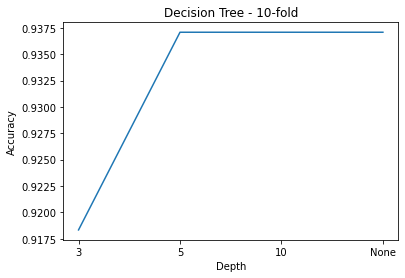

In [34]:
#Decision tree
kf = KFold(n_splits=10)
max_depth = [3,5,10,None]
performance_dict = {}
for max_d in max_depth:
    acc = []
    for train_index,val_index in kf.split(X_train):
        clf = DecisionTreeClassifier(max_depth = max_d, random_state=0, criterion='gini')
        X_Tr = X_train.iloc[train_index,:]
        Y_Tr = Y_train.iloc[train_index,:]
        X_V = X_train.iloc[val_index,:]
        Y_V = Y_train.iloc[val_index,:]
        clf = clf.fit(X_Tr, Y_Tr)
        Y_P = clf.predict(X_V)
        acc.append(metrics.accuracy_score(Y_V, Y_P))
    performance_dict[max_d] = np.mean(acc)
accuracies = list(performance_dict.values())
plt.title("Decision Tree - 10-fold")
plt.plot([1,2,3,4], accuracies)
plt.xticks([1,2,3,4],['3','5','10','None'])
plt.xlabel('Depth')
plt.ylabel('Accuracy')
#tree.plot_tree(clf)

In [35]:
clf = DecisionTreeClassifier(max_depth = 5, random_state=0, criterion='gini')
clf = clf.fit(X_train,Y_train)
Y_P = clf.predict(X_test)
DT_Test_Acc = metrics.accuracy_score(Y_test, Y_P)
print("Decision Tree Test Accuracy at depth of 5 is...", DT_Test_Acc)

Decision Tree Test Accuracy at depth of 5 is... 0.8


Text(33.0, 0.5, 'Depth')

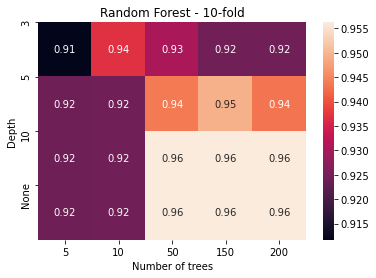

In [36]:
#Random Forest
kf = KFold(n_splits=10)
n_trees = [5,10,50,150,200]
max_depth = [3,5,10,None]
perf_n_tree = pd.DataFrame()
perf_depth = []
for n_tree in n_trees:
    perf_depth=[]
    for max_d in max_depth:
        acc = []
        for train_index,val_index in kf.split(X_train):
            clf = RandomForestClassifier(max_depth = max_d,n_estimators = n_tree, random_state=0)
            X_Tr = X_train.iloc[train_index,:]
            Y_Tr = Y_train.iloc[train_index,:]
            X_V = X_train.iloc[val_index,:]
            Y_V = Y_train.iloc[val_index,:]
            clf = clf.fit(X_Tr, Y_Tr)
            Y_P = clf.predict(X_V)
            acc.append(metrics.accuracy_score(Y_V, Y_P))
        perf_depth.append(np.mean(acc))
    #perf_n_tree[n_tree]=copy.deepcopy(perf_depth)
    perf_n_tree[str(n_tree)]=perf_depth
accuracies = list(performance_dict.values())
plt.title("Random Forest - 10-fold")
hm = sns.heatmap(perf_n_tree, annot=True)
plt.yticks([0,1,2,3],['3','5','10','None'])
plt.xlabel('Number of trees')
plt.ylabel('Depth')

In [37]:
clf = RandomForestClassifier(max_depth = 10, random_state=0, n_estimators=50)
clf = clf.fit(X_train,Y_train)
Y_P = clf.predict(X_test)
RF_Test_Acc = metrics.accuracy_score(Y_test, Y_P)
print("Random Forest Test Accuracy at depth of 10 and Max 50 no of trees is...", RF_Test_Acc)

Random Forest Test Accuracy at depth of 10 and Max 50 no of trees is... 0.875


Text(0, 0.5, 'Accuracy')

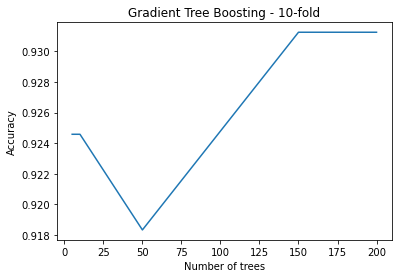

In [38]:
#Gradient Boosting Classifier
kf = KFold(n_splits=10)
n_trees = [5,10,50,150,200]
perf_n_tree = []
for n_tree in n_trees:
    acc = []
    for train_index,val_index in kf.split(X_train):
        clf = GradientBoostingClassifier(n_estimators = n_tree)
        X_Tr = X_train.iloc[train_index,:]
        Y_Tr = Y_train.iloc[train_index,:]
        X_V = X_train.iloc[val_index,:]
        Y_V = Y_train.iloc[val_index,:]
        clf = clf.fit(X_Tr, Y_Tr)
        Y_P = clf.predict(X_V)
        acc.append(metrics.accuracy_score(Y_V, Y_P))
    perf_n_tree.append(np.mean(acc))
    #perf_n_tree[n_tree]=copy.deepcopy(perf_depth)
plt.title("Gradient Tree Boosting - 10-fold")
plt.plot(n_trees, perf_n_tree)
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')

In [39]:
clf = GradientBoostingClassifier(n_estimators=150)
clf = clf.fit(X_train,Y_train)
Y_P = clf.predict(X_test)
GB_Test_Acc = metrics.accuracy_score(Y_test, Y_P)
print("Gradient Boosting Test Accuracy at  Max 50 no of trees is...", GB_Test_Acc)

Gradient Boosting Test Accuracy at  Max 50 no of trees is... 0.875


### We can see that, without any sort of feature selection and preprocessing, for the same models we are getting considerably lesser accuracy. This signifies the importance of feature selection and preprocessing steps of Machine Learning Pipeline. Without preprocessing or feature selection, the best accuracy we get with test data is 0.875. With feature selection, we are getting an accuracy of 0.97 which is a significant increase.